# Agenda

1. OSI
    1. OSI model
    2. TCP/IP model
    3. Data Flow

2. Protocols
    1. Client-Server
    2. Transport layer protocol
    3. Network layer protocol
    4. Domains
    5. Sockets

3. Python 'socket' library

4. Some Python clients of various protocols. 3rd party
    1. http
    2. ssh
    3. winrm

5. Advanced topics related to networking with Python
    


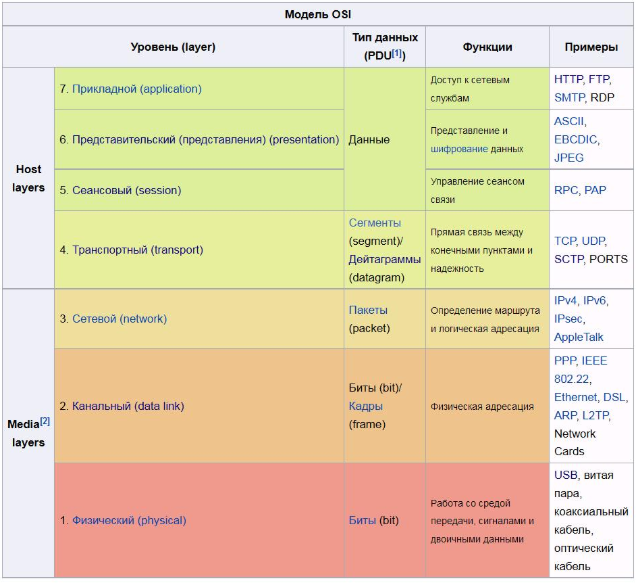


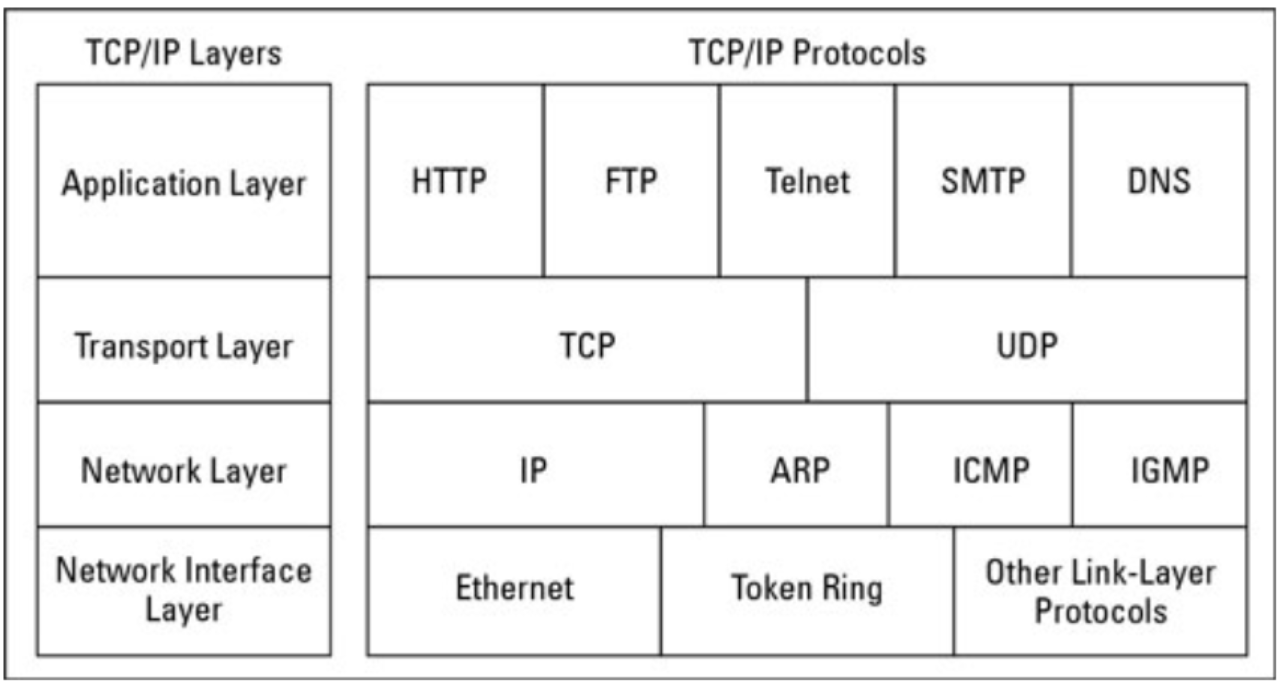

# As application developers, we are interested in:
__Transport protocols (TCP or UPD)__ - implemented by OPERATING SYSTEM libraries and kernel<br>
__Application protocols (like HTTP or HTTPs)__ - implemented by our APPLICATION


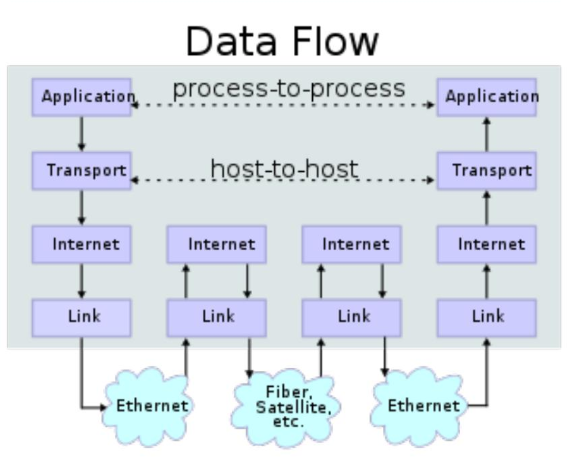

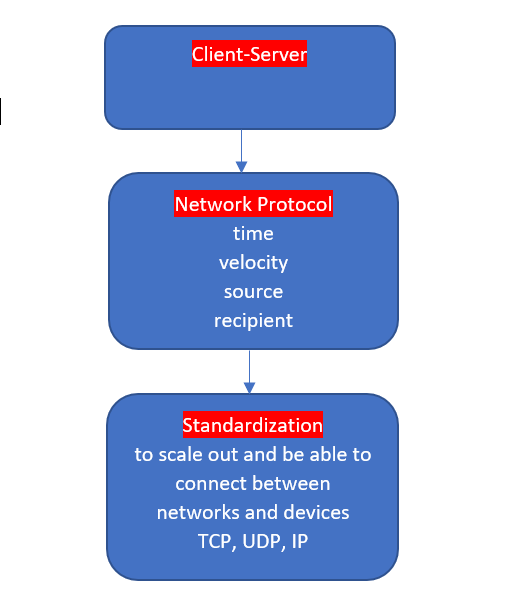


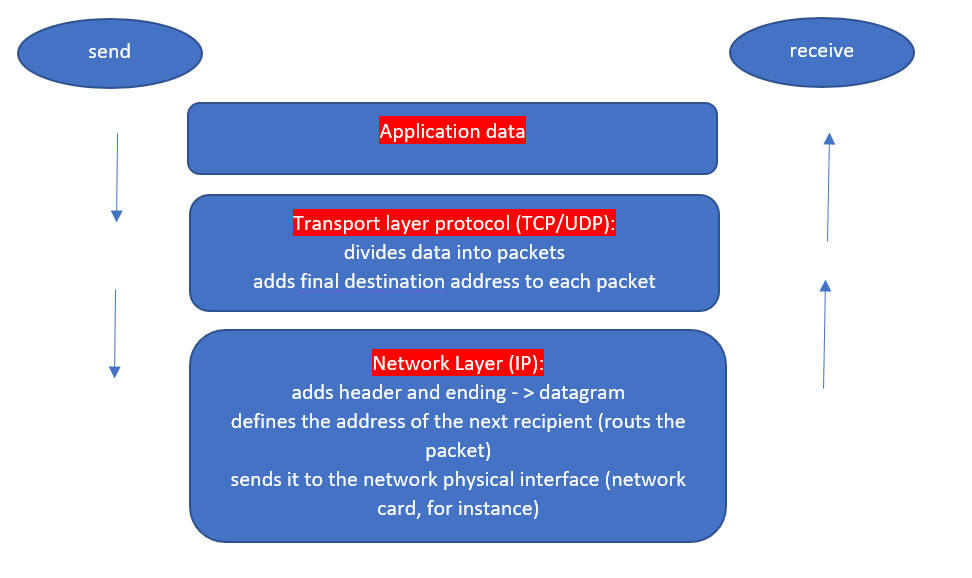


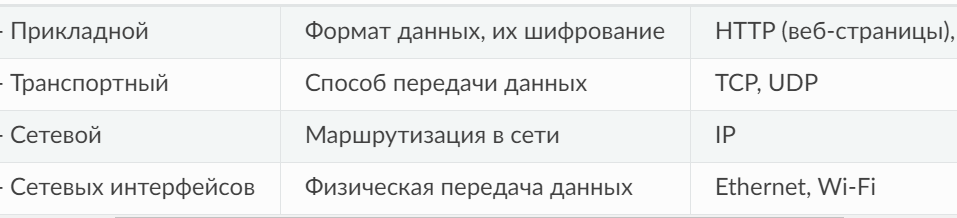





# Transport layer: TCP and UDP

- both are associated with IP address and port number
- UDP messages (also called datagrams) are "fire and forget". delivery of messages are not guaranteed
- TCP controls order of messages and deliverability (error checking)

> Cases for using UDP:

- Gaming network code
- Telemetry data collection from thin (IoT) devices
- Gathering image frames from monitoring cameras
- Other cases when deliverability / order of messages is not critical, but performance is<br>

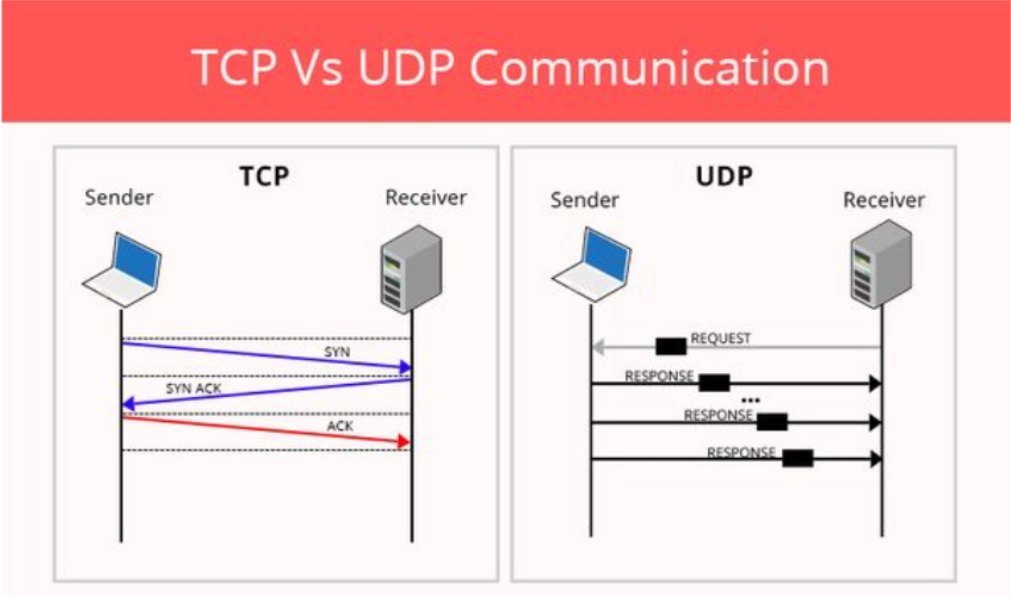

# Network layer: IP

__tasks:__<br>
- addressing (host + network)
- routing<br>

###  Main notion here  is IP address

__IPv4 addresses:__<br>

1. dotted decimal notation - denotes a single address

    192.168.1.1<br>
    127.0.0.1<br>
    10.10.1.55<br>
2. prefix notation - denotes a group of addresses (subnetwork)

    192.147.0.0/24
    
__IPv6 addresses:__<br>

1. hexadecimal notation

    2001:db8:85a3:8d3:1319:8a2e:370:7348<br><br>
2. prefix notation

    2001:db8:1234::/48<br>
 

# DNS

All information about domain names is stored in a distributed database of DNS (Domain Name System), which is a network of computers scattered around the world.


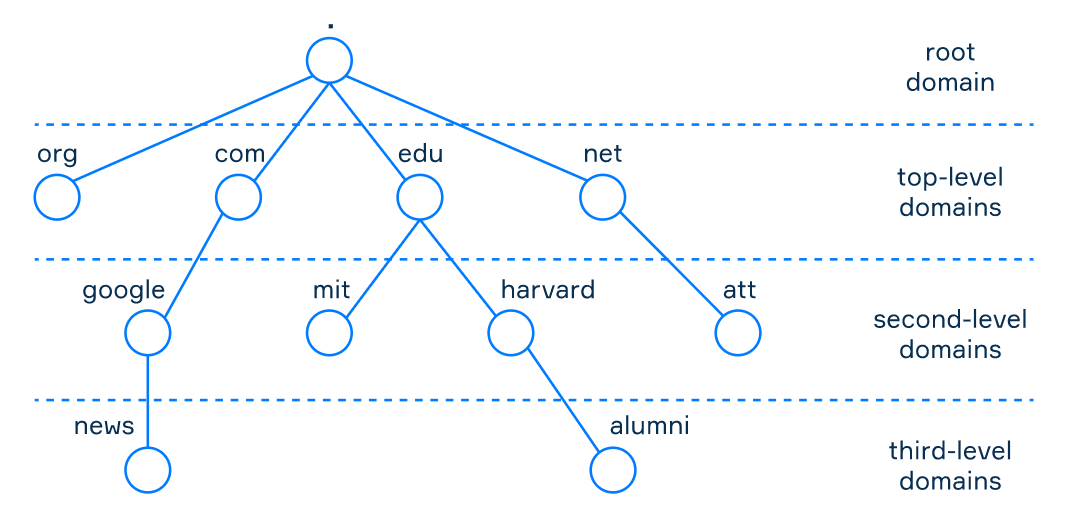


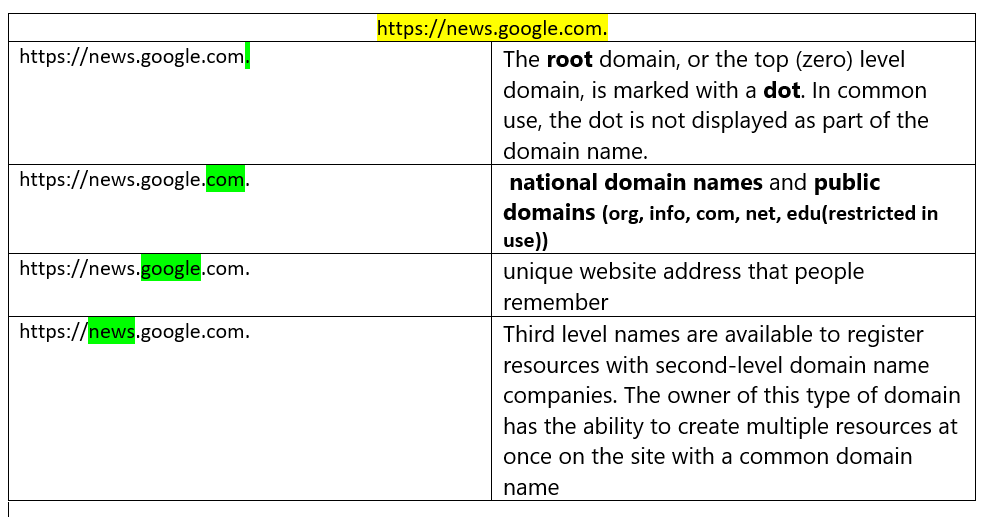



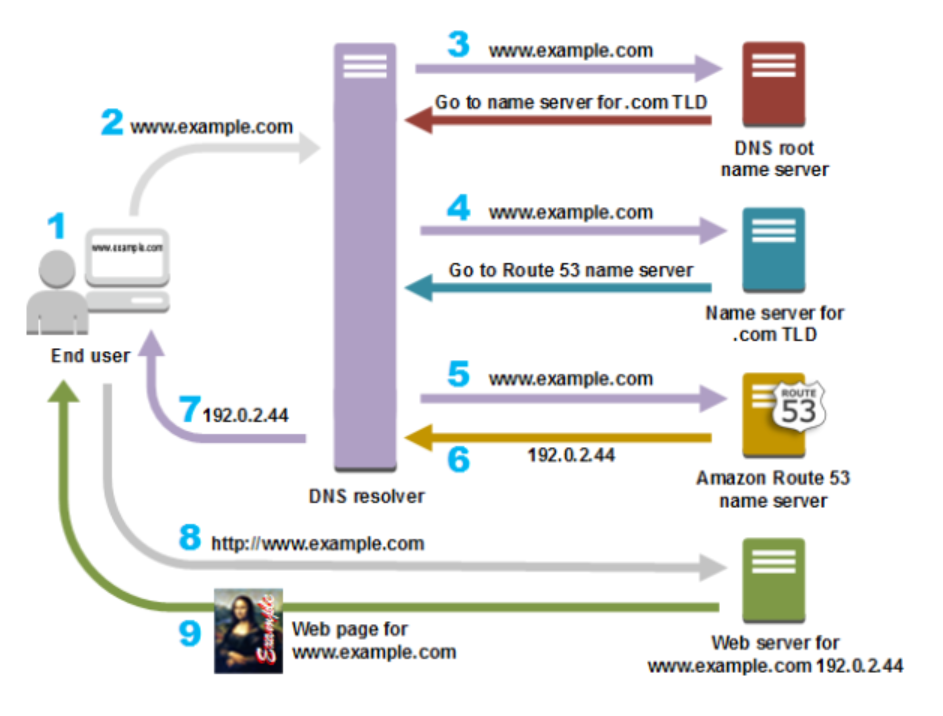


# Sockets



- Endpoints of bi-directional connection channel
- Inside the process, between processes on the same host or different hosts
- Different channel types: domain Unix sockets, TCP, UDP
- In fact it is an API for IPC (intercrosses communication)
- Server socket, client socket
- sockets work on transport layers:  SOCK_STREAM (TCP based, byte streams, bi-directional); SOCK_DGRAM (UDP, datagram based, does not require ack between endpoints)
- Socket = IP (unique in a network) + port (natural number, written into header of transport layer protocol, to define process-recipient)



# Python Socket module

https://docs.python.org/3/library/

https://docs.python.org/3/library/socket.html

https://docs.python.org/3/howto/sockets.html#socket-howto

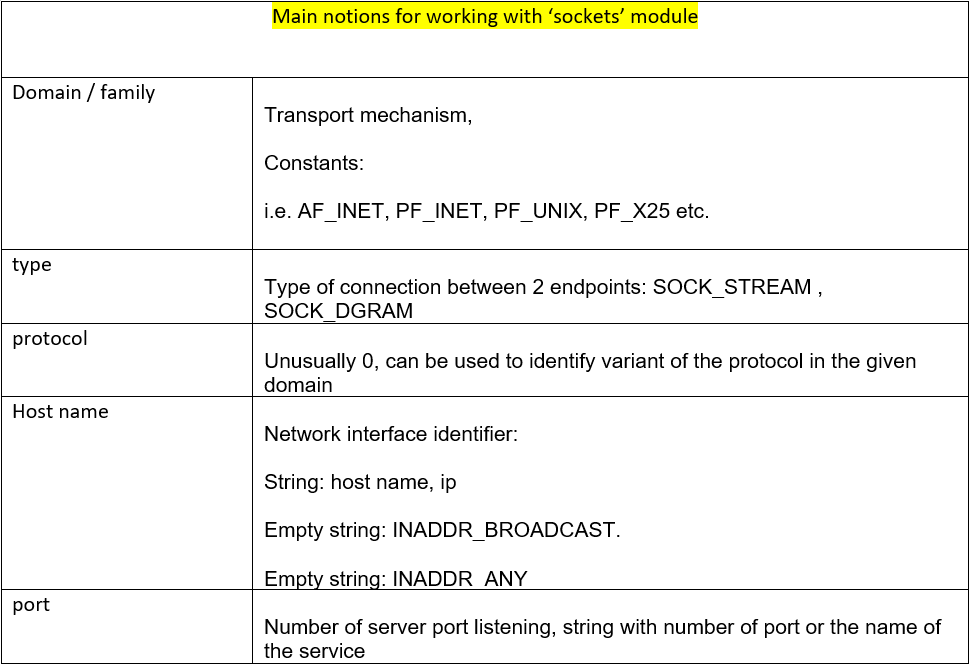

https://realpython.com/python-sockets/

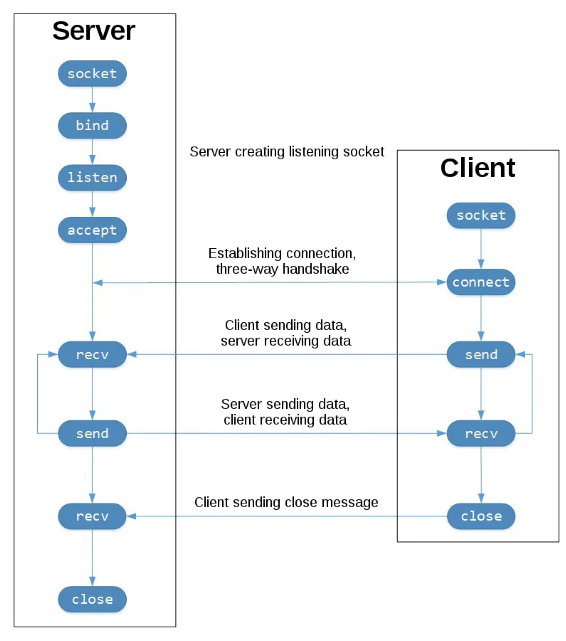

In [ ]:
# in python:
# server:
import socket

s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.bind(("0.0.0.0", 9000))
s.listen(1) # blocking socket creation: the entire server is stalled until it returns
        
while True:
    conn, addr = s.accept()
    print("Received connection from", addr)
    conn.send(f"Hello {addr}\n".encode())
    conn.close()

Loop:

- dispatch a thread to handle client socket
- create a new process to handle client socket
- restructure this app to use non-blocking sockets and multiplex between  “server” socket and any active client sockets using select (*)

(*)
select() allows you to check for I/O completion on more than one socket. So you can call select() to see which sockets have I/O ready for reading and/or writing.

In [ ]:
# client:
import socket
s = socket.socket()
s.connect(("127.0.0.1", 9000))
print(s.recv(1024))
s.close()

- client and server initially identical, designer of the protocol decides who starts conversation
- Send/receive return when the associated network buffers have been filled (send) or emptied (recv)
- if a socket send or recv returns after handling 0 bytes, the connection has been broken
- no EOT for sockets
- Designer faces dilema: messages must either be fixed length, or be delimited, or indicate how long they are, or end by shutting down the connection.



How do we handle multiple connections concurrently?
We need to call send() and recv() until all data is sent or received.


-> asyncio, threading, select  depends on cpu bound or i/o bound app you are developing

# Some of the application layer protocols clients from std library

https://docs.python.org/3/library/internet.html


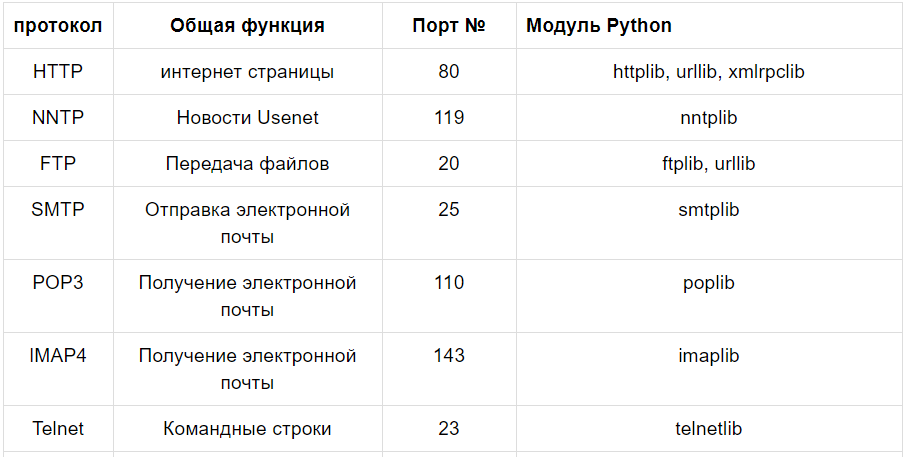

# Http requests


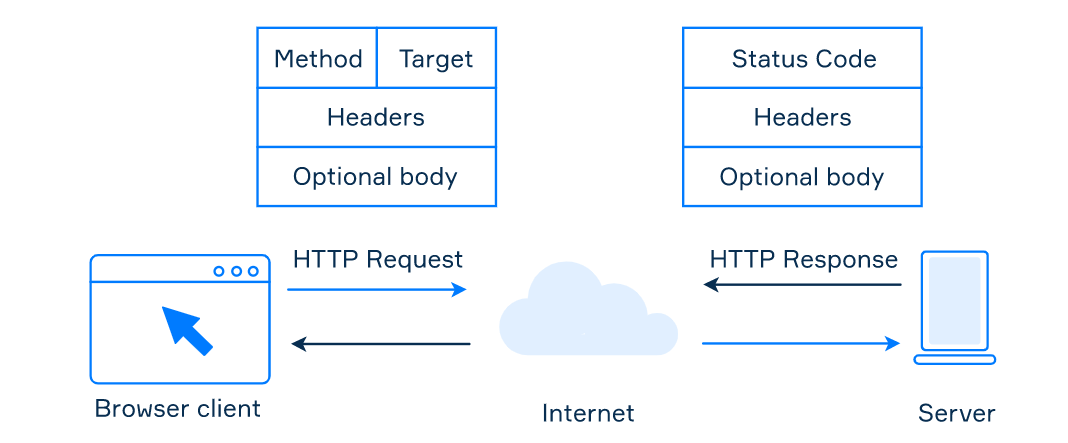

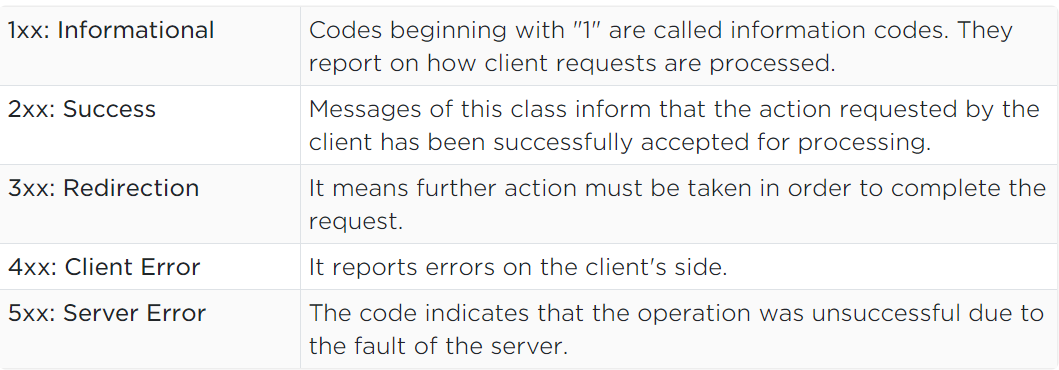

In [4]:
import requests

params = {'q': 'requests'}
r = requests.get('http://python.org/search', params=params)
# r = requests.get('https://requests.readthedocs.io/en/master/')
print(r)
print(r.status_code)
if r:
    print('Success!')
else:
    print('Fail')
# print(r.text)
r.encoding
print(r.headers)
r.headers['Content-Type']
r.headers['content-type'] 


    
    



<Response [200]>
200
Success!
<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">
    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js">

    <meta name="application-name" content="Python.org">
    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">
    <meta name="apple-mobile-web-app-title" content="Python.org">
    <meta name="apple-mobile-web-app-capable" content="yes">
    <meta name="apple-mobile-web-app-status-bar-style" cont

'text/html; charset=utf-8'

In [ ]:
# manipulate data
import requests


data = {'post_text': 'Today, I started learning Python. Exciting!'}
r = requests.post('http://bestblogever.com/posts', data=data)


data = {'post_text': 'some_updated_text'}
r = requests.put('http://bestblogever.com/posts/<post_id>', data=data)

r = requests.delete('http://bestblogever.com/posts/<post_id>')


# SSH
http://docs.paramiko.org/en/stable/api/client.html

client = SSHClient()<br>
client.load_system_host_keys()<br>
client.connect('ssh.example.com')<br>
stdin, stdout, stderr = client.exec_command('ls -l')<br>

# Winrm

https://super-devops.readthedocs.io/en/latest/winrm.html


# Some tools which use pywinrm and paramiko

Testinfra<br>

https://testinfra.readthedocs.io/en/latest/

Ansible<br>
https://www.ansible.com/

# Advanced topics

- other IPC techniques: pipes, shared memory. Module Subprocess
- Async, Await
- threading, multiprocessing
- security
- web frameworks 